In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

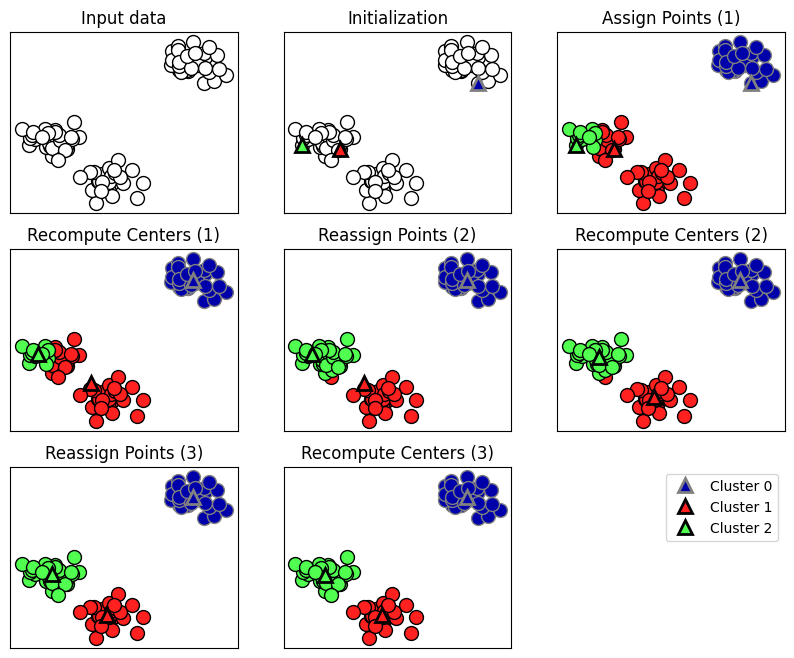

In [3]:
mglearn.plots.plot_kmeans_algorithm()
plt.show()

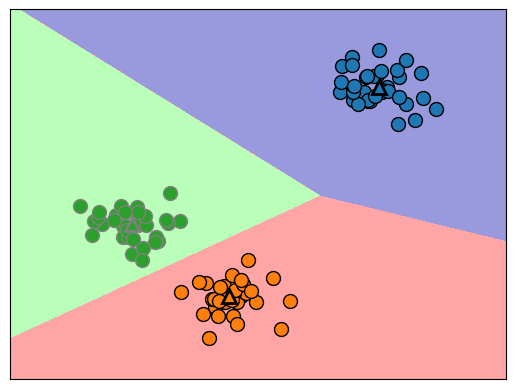

In [4]:
mglearn.plots.plot_kmeans_boundaries()
plt.show()

Принадлежность к кластерам:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


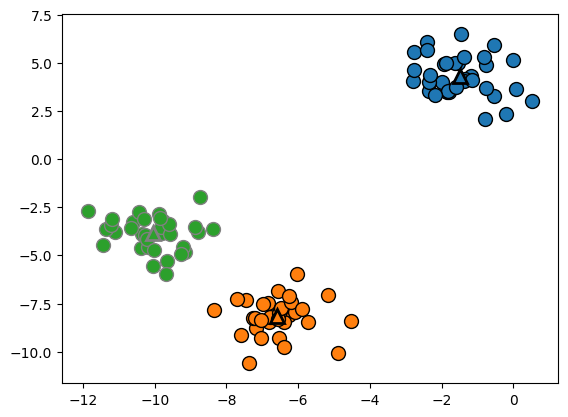

In [6]:
# генерируем синтетические двумерные данные
X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# строим модель кластеризации
print("Принадлежность к кластерам:\n{}".format(kmeans.labels_))
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)
plt.show()

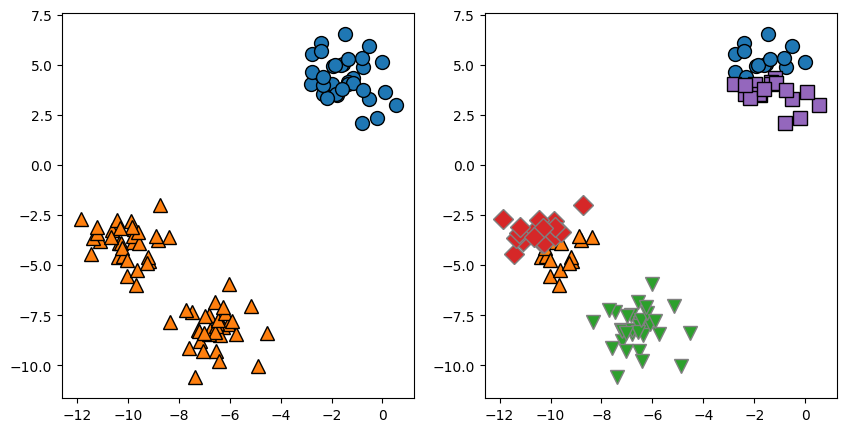

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# использование двух центров кластеров:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# использование пяти центров кластеров:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

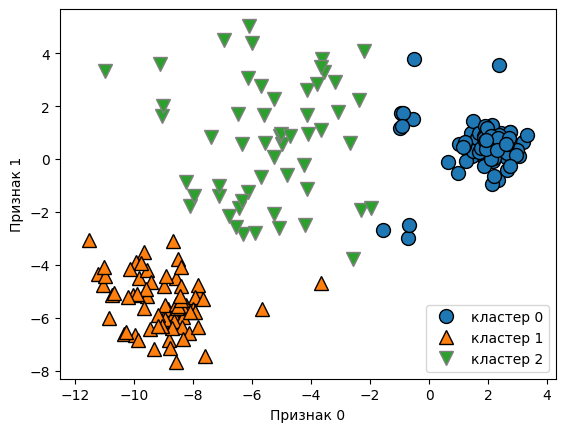

In [8]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["кластер 0", "кластер 1", "кластер 2"], loc='best')
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

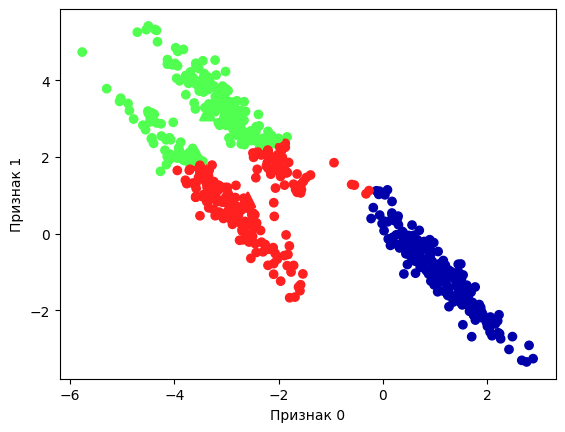

In [9]:
# генерируем случайным образом данные для кластеризации
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# преобразуем данные так, чтобы они были вытянуты по диагонали
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# группируем данные в три кластера
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# строим график принадлежности к кластерам и центров кластеров
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidth=2,
            cmap=mglearn.cm3)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

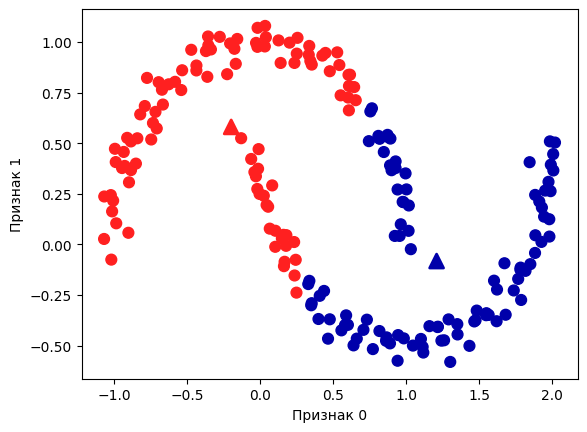

In [10]:
# генерируем синтетические данные two_moons (на этот раз с меньшим количеством шума)

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# группируем данные в два кластера
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# строим график принадлежности к кластерам и центров кластеров
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()
